# Customer Churn Analysis - Data Cleaning

In [1]:
# this notebook implements cleaning steps of the customer churn dataset

# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# global set printing
pd.set_option('display.max_columns', None)
pd.options.display.max_columns = None


In [2]:
# load the raw dataset
df = pd.read_csv('backend/data/raw/customer_churn.csv')
print("Original shape:", df.shape)
print("n\Dataset Info:")
df.info()

Original shape: (7043, 21)
n\Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16 

## Converting data types

In [3]:
# first, let's make a copy of the data 
clean_df = df.copy()

# lets look at some of the values in our df
#clean_df.head(50)

In [4]:
# now let's look at some unique values
print("gender unique values:", clean_df['gender'].unique())
print("SeniorCitizen unique values:", clean_df['SeniorCitizen'].unique())
print("Partner unique values:", clean_df['Partner'].unique())
print("Dependents unique values:", clean_df['Dependents'].unique())
print("PhoneService unique values:", clean_df['PhoneService'].unique())
print("MultipleLines unique values:", clean_df['MultipleLines'].unique())
print("InternetService unique values:", clean_df['InternetService'].unique())
print("OnlineSecurity unique values:", clean_df['OnlineSecurity'].unique())
print("OnlineBackup unique values:", clean_df['OnlineBackup'].unique())
print("DeviceProtection unique values:", clean_df['DeviceProtection'].unique())
print("TechSupport unique values:", clean_df['TechSupport'].unique())
print("StreamingTV unique values:", clean_df['StreamingTV'].unique())
print("StreamingMovies unique values:", clean_df['StreamingMovies'].unique())
print("Contract unique values:", clean_df['Contract'].unique())
print("PaperlessBilling unique values:", clean_df['PaperlessBilling'].unique())
print("PaymentMethod unique values:", clean_df['PaymentMethod'].unique())


gender unique values: ['Female' 'Male']
SeniorCitizen unique values: [0 1]
Partner unique values: ['Yes' 'No']
Dependents unique values: ['No' 'Yes']
PhoneService unique values: ['No' 'Yes']
MultipleLines unique values: ['No phone service' 'No' 'Yes']
InternetService unique values: ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values: ['No' 'Yes' 'No internet service']
OnlineBackup unique values: ['Yes' 'No' 'No internet service']
DeviceProtection unique values: ['No' 'Yes' 'No internet service']
TechSupport unique values: ['No' 'Yes' 'No internet service']
StreamingTV unique values: ['No' 'Yes' 'No internet service']
StreamingMovies unique values: ['No' 'Yes' 'No internet service']
Contract unique values: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling unique values: ['Yes' 'No']
PaymentMethod unique values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


some boolean columns have another value other than yes/no. we can map those to no 

In [5]:
# our data has many indicator features that are represented by yes and no... let's implement some binary encoding to turn them into numeric data
clean_df["Churn"] = clean_df["Churn"].map({"Yes": 1, "No": 0})
clean_df["PaperlessBilling"] = clean_df["PaperlessBilling"].map({"Yes": 1, "No": 0})
clean_df["StreamingMovies"] = clean_df["StreamingMovies"].map({"No internet service": 0, "Yes": 1, "No": 0})
clean_df["StreamingTV"] = clean_df["StreamingTV"].map({"No internet service": 0, "Yes": 1, "No": 0})
clean_df["TechSupport"] = clean_df["TechSupport"].map({"No internet service": 0, "Yes": 1, "No": 0})
clean_df["DeviceProtection"] = clean_df["DeviceProtection"].map({"No internet service": 0, "Yes": 1, "No": 0})
clean_df["OnlineBackup"] = clean_df["OnlineBackup"].map({"No internet service": 0, "Yes": 1, "No": 0})
clean_df["OnlineSecurity"] = clean_df["OnlineSecurity"].map({"No internet service": 0,"Yes": 1, "No": 0})
clean_df["PhoneService"] = clean_df["PhoneService"].map({"Yes": 1, "No": 0})
clean_df["Dependents"] = clean_df["Dependents"].map({"Yes": 1, "No": 0})
clean_df["Partner"] = clean_df["Partner"].map({"Yes": 1, "No": 0})
clean_df["MultipleLines"] = clean_df["MultipleLines"].map({"No phone service": 0, "Yes": 1, "No": 0})


# check my work
clean_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [6]:
clean_df.head(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.5,1
6,1452-KIOVK,Male,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,Female,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.9,0
8,7892-POOKP,Female,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [7]:
# convert TotalCharges and MonthlyCharges to a float
clean_df["TotalCharges"] = pd.to_numeric(arg=clean_df["TotalCharges"], errors='coerce')
clean_df["MonthlyCharges"] = pd.to_numeric(arg=clean_df["MonthlyCharges"], errors='coerce')

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


## Handle missing values

The **TotalCharges** column isn't missing a significant amount of values, so we can just fill it with the mean of the column

In [8]:
# fill TotalCharges missing values with the mean of the columns
clean_df['TotalCharges'] = clean_df['TotalCharges'].fillna(clean_df['TotalCharges'].mean())
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


## Handle Outliers

### Taking a look at the distribution...

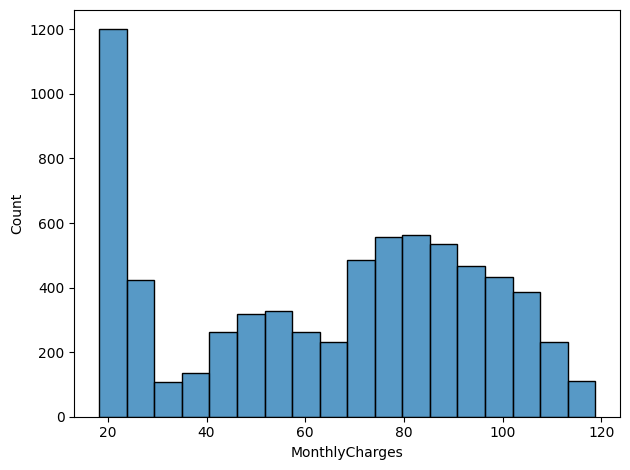

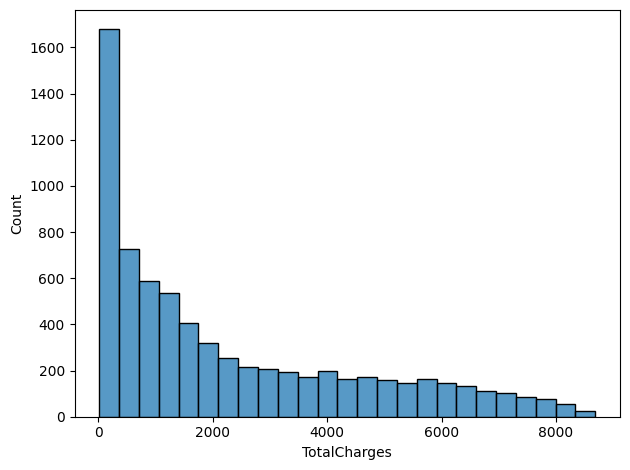

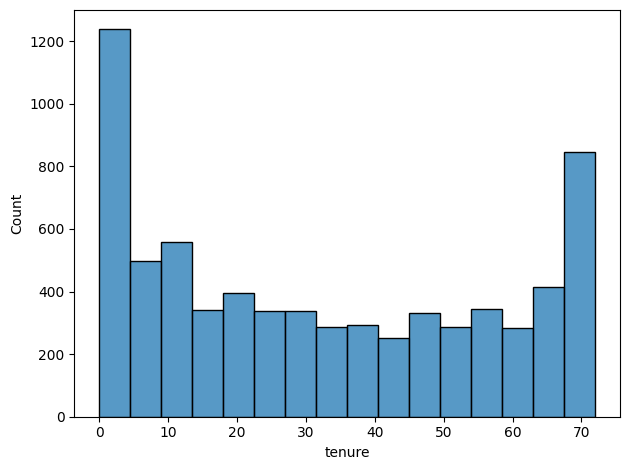

In [9]:
def check_distribution(df, columns):
    for column in columns:
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(data=df,x=column)
            plt.tight_layout()
            plt.show()
num_cols = clean_df[['MonthlyCharges','TotalCharges', 'tenure']]
check_distribution(clean_df, num_cols)

Our numeric columns have a skewed distributions, but let's see if we can make sense of this.

For Tenure, we can see a typical customer lifecycle. A lot of new customers (low tenure) and the count of tenure slowly decreases as the amount of loyal customer shrinks. Most people with shop around for different providers so it makes sense that it levels out in the middle. It rises up near the maximum for this dataset which could indicate that this data's company has good customer tenure.

For MonthlyCharges, we can see an interesting distribution. These monthly charges must relate to different tier packages that customers can choose from
* Basic plans/packages around $20-$30
* Mid-term plans/packages around $40-$60
* Premium, High-end plans/packages $80 and up

### Handle Potential Outliers

In the event there are outliers that don't have any value to modeling, we need to handle those appropriately. 
Let's use the statistical method IQR to find the upper and lower bounds of our data and write and of outliers to those bounds respectively.

In [10]:
# function for handling outliers
def handle_outliers(df, columns):
    for column in columns:
        if df[column].dtype in ['int64', 'float64']:
            # calculating IQR
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            print(f"{column} Q1 is {Q1}. Lowerbound is {lower_bound}")
            print(f"{column} Q3 is {Q3}. Upperbound is {upper_bound}")
            print("\n")
                    
            # count outliers
            outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
            
            
            if len(outliers) > 0:
                print(f"\nHandling outliers in {column}")
                print(f"- Number of outliers: {len(outliers)}")
                print("\n")
                clean_df.loc[clean_df[column] < lower_bound, column] = lower_bound
                clean_df.loc[clean_df[column] > upper_bound, column] = upper_bound
                print(f"- Capped values between {lower_bound:.2f} and {upper_bound:.2f}")
                
    return df

numeric_cols = clean_df[['MonthlyCharges', 'TotalCharges', 'tenure']]
outlier_df  = handle_outliers(clean_df,numeric_cols)

MonthlyCharges Q1 is 35.5. Lowerbound is -46.02499999999999
MonthlyCharges Q3 is 89.85. Upperbound is 171.375


TotalCharges Q1 is 402.225. Lowerbound is -4674.3375
TotalCharges Q3 is 3786.6. Upperbound is 8863.1625


tenure Q1 is 9.0. Lowerbound is -60.0
tenure Q3 is 55.0. Upperbound is 124.0




In [11]:
clean_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


## Standardizing Categorical Values

To ensure that all the values are seen the same way by the model, we should standardize aspects of the data like character case and any whitespace that may exist

In [12]:
def standardize_data(df):
    categorical_cols = df.select_dtypes(include=["object"]).columns
    
    for column in categorical_cols:
        # convert to lower case
        df[column] = df[column].str.lower()
        
        # remove whitespace
        df[column] = df[column].str.strip()
    return df

standardize_data(clean_df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,1,0,1,0,0,dsl,0,1,0,0,0,0,month-to-month,1,electronic check,29.85,29.85,0
1,5575-gnvde,male,0,0,0,34,1,0,dsl,1,0,1,0,0,0,one year,0,mailed check,56.95,1889.50,0
2,3668-qpybk,male,0,0,0,2,1,0,dsl,1,1,0,0,0,0,month-to-month,1,mailed check,53.85,108.15,1
3,7795-cfocw,male,0,0,0,45,0,0,dsl,1,0,1,1,0,0,one year,0,bank transfer (automatic),42.30,1840.75,0
4,9237-hqitu,female,0,0,0,2,1,0,fiber optic,0,0,0,0,0,0,month-to-month,1,electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-resvb,male,0,1,1,24,1,1,dsl,1,0,1,1,1,1,one year,1,mailed check,84.80,1990.50,0
7039,2234-xaduh,female,0,1,1,72,1,1,fiber optic,0,1,1,0,1,1,one year,1,credit card (automatic),103.20,7362.90,0
7040,4801-jzazl,female,0,1,1,11,0,0,dsl,1,0,0,0,0,0,month-to-month,1,electronic check,29.60,346.45,0
7041,8361-ltmkd,male,1,1,0,4,1,1,fiber optic,0,0,0,0,0,0,month-to-month,1,mailed check,74.40,306.60,1


In [13]:
# check my work
clean_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,1,0,1,0,0,dsl,0,1,0,0,0,0,month-to-month,1,electronic check,29.85,29.85,0
1,5575-gnvde,male,0,0,0,34,1,0,dsl,1,0,1,0,0,0,one year,0,mailed check,56.95,1889.50,0
2,3668-qpybk,male,0,0,0,2,1,0,dsl,1,1,0,0,0,0,month-to-month,1,mailed check,53.85,108.15,1
3,7795-cfocw,male,0,0,0,45,0,0,dsl,1,0,1,1,0,0,one year,0,bank transfer (automatic),42.30,1840.75,0
4,9237-hqitu,female,0,0,0,2,1,0,fiber optic,0,0,0,0,0,0,month-to-month,1,electronic check,70.70,151.65,1


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Save cleaned dataframe 

In [16]:
clean_df.to_csv('backend/data/processed/customer_churn_clean.csv', index=False)
print("\nCleaned data saved to 'backend/data/processed/customer_churn_clean.csv'")


Cleaned data saved to 'backend/data/processed/customer_churn_clean.csv'
